In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [ ]:
merged_usd_df = pd.read_csv("/content/drive/MyDrive/AI capstone/dataset_updated/merged_usd_profit.csv")
print(merged_usd_df.head())

     ticket     login  symbol  cmd  volume   open_time  open_price  \
0  67448384   7057066  XAUUSD    0   59.25  1704224026     2064.90   
1  67448386   7057066  XAUUSD    0   59.25  1704224028     2064.83   
2  68459401   7057066  XAUUSD    0   51.30  1706822869     2056.60   
3  68459399   7057066  XAUUSD    0   51.30  1706822866     2056.57   
4  64906125  88944670  XAUUSD    0   48.15  1697792473     1978.91   

   close_time  close_price       tp       sl  reason  commission  swaps  \
0  1704719914      2019.26  2094.52  2019.43       1         0.0    0.0   
1  1704719914      2019.26  2094.52  2019.43       1         0.0    0.0   
2  1707760417      2012.17  2085.07  2006.70       1         0.0    0.0   
3  1707760418      2012.17  2158.27  1998.68       1         0.0    0.0   
4  1699648983      1934.60  2017.00  1923.81       1         0.0    0.0   

      profit   volume_usd open_time_datetime close_time_datetime  \
0 -270417.00  24198648.00         2024-01-02          2024-0

# visuals

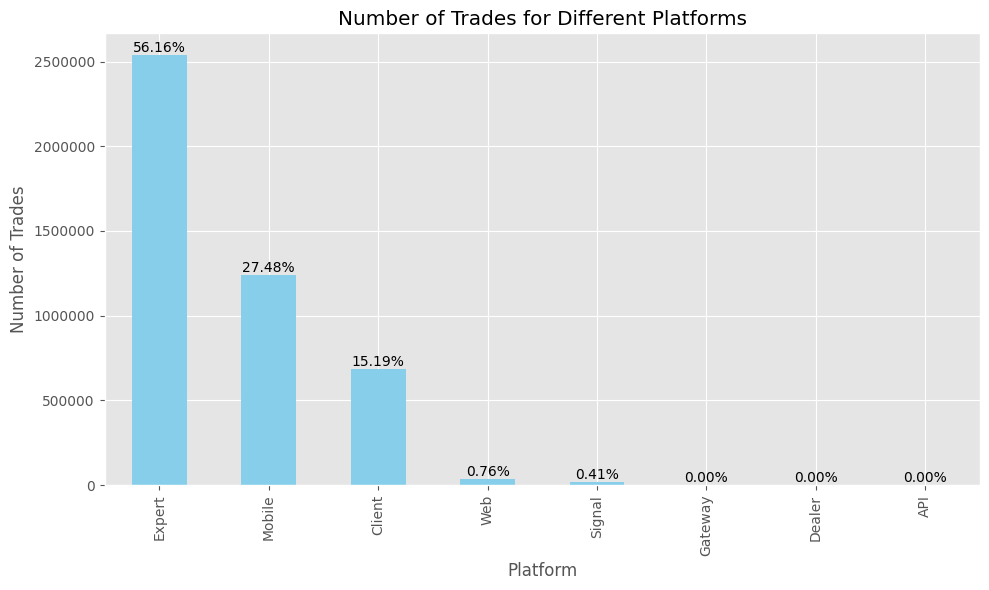

In [ ]:
import matplotlib.pyplot as plt

platform_map = {
    0: 'Client',
    1: 'Expert',
    2: 'Dealer',
    3: 'Signal',
    4: 'Gateway',
    5: 'Mobile',
    6: 'Web',
    7: 'API'
}

platform_counts = merged_usd_df['reason'].map(platform_map).value_counts()

plt.figure(figsize=(10, 6))
platform_counts.plot(kind='bar', color='skyblue')

plt.xlabel('Platform')

plt.ylabel('Number of Trades')

total_trades = platform_counts.sum()
for i, count in enumerate(platform_counts):
    percentage = (count / total_trades) * 100
    plt.text(i, count, f'{percentage:.2f}%', ha='center', va='bottom')

plt.ticklabel_format(style='plain', axis='y')

plt.title('Number of Trades for Different Platforms')

plt.tight_layout()
plt.show()


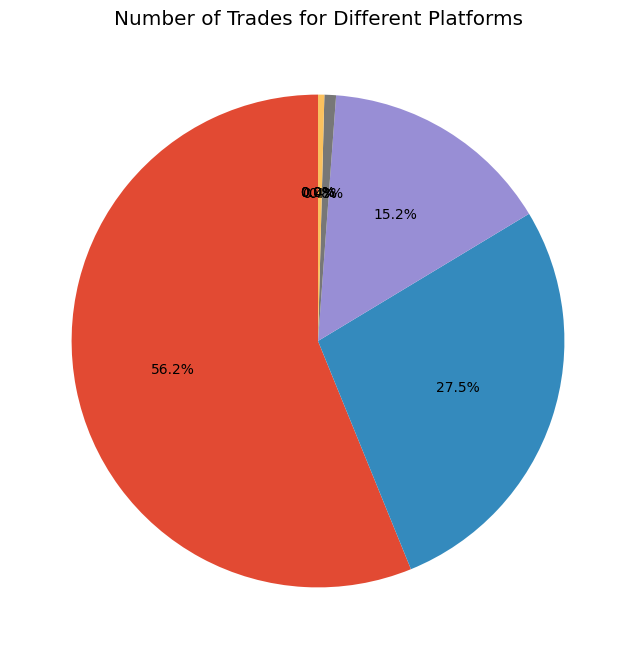

In [ ]:
import matplotlib.pyplot as plt

platform_map = {
    0: 'Client',
    1: 'Expert',
    2: 'Dealer',
    3: 'Signal',
    4: 'Gateway',
    5: 'Mobile',
    6: 'Web',
    7: 'API'
}

platform_counts = merged_usd_df['reason'].map(platform_map).value_counts()

plt.figure(figsize=(8, 8))
plt.pie(platform_counts, labels=None, autopct='%1.1f%%', startangle=90)

plt.title('Number of Trades for Different Platforms')

plt.show()

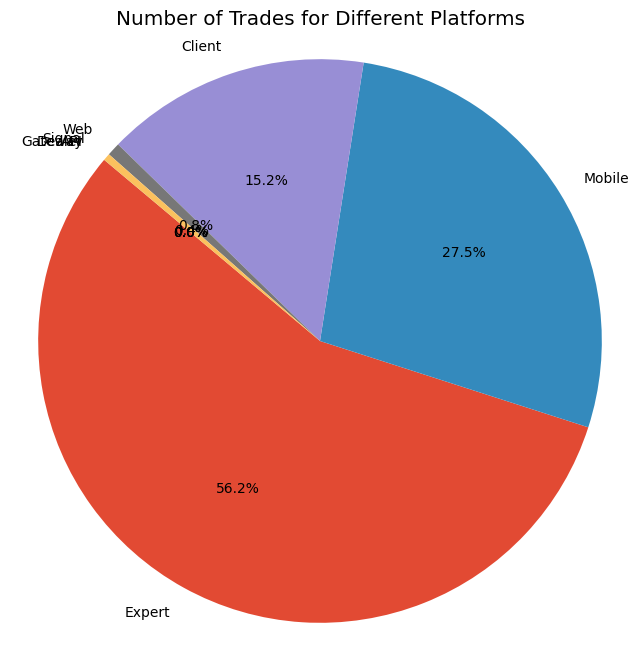

In [ ]:

reason_map = {
    0: 'Client',
    1: 'Expert',
    2: 'Dealer',
    3: 'Signal',
    4: 'Gateway',
    5: 'Mobile',
    6: 'Web',
    7: 'API'
}

reason_counts = merged_usd_df['reason'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(reason_counts, labels=[reason_map[reason] for reason in reason_counts.index], autopct='%1.1f%%', startangle=140)
plt.title('Number of Trades for Different Platforms')

plt.axis('equal')

plt.show()


In [ ]:
profit_by_login = merged_usd_df.groupby('login')['profit_usd'].sum()

top_50_profitable_logins = profit_by_login.sort_values(ascending=False).head(50)

print("Top 50 Most Profitable Logins:")
print(top_50_profitable_logins)

Top 50 Most Profitable Logins:
login
88944670    1.022132e+06
520167      6.100031e+05
812807      4.563723e+05
7059149     2.633539e+05
820765      2.345876e+05
804744      2.285458e+05
778845      2.074648e+05
816189      2.021440e+05
821517      1.937899e+05
822580      1.843373e+05
523275      1.695884e+05
813280      1.645257e+05
524205      1.232745e+05
776514      1.188238e+05
764769      1.125929e+05
823263      1.081530e+05
766658      1.078776e+05
823915      9.967944e+04
518130      9.915852e+04
505989      9.447333e+04
522430      9.220926e+04
771707      9.161441e+04
807331      8.971830e+04
508928      8.649404e+04
811205      8.496667e+04
522660      8.152763e+04
805483      8.083416e+04
7059146     8.065042e+04
813735      7.805475e+04
7059314     6.830845e+04
774459      6.753388e+04
816663      6.272231e+04
821006      6.190077e+04
813375      6.187548e+04
817117      6.148833e+04
811228      6.089281e+04
818839      5.758379e+04
807598      5.641870e+04
806283      5

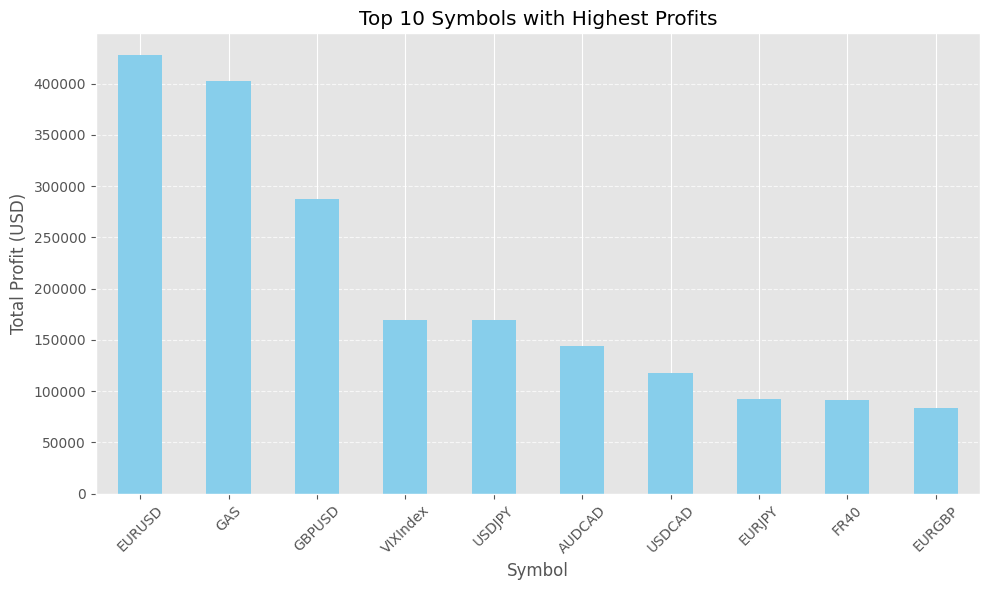

In [ ]:
profit_by_symbol = merged_usd_df.groupby('symbol')['profit_usd'].sum()

top_10_symbols = profit_by_symbol.nlargest(10)

plt.figure(figsize=(10, 6))
top_10_symbols.plot(kind='bar', color='skyblue')
plt.xlabel('Symbol')
plt.ylabel('Total Profit (USD)')
plt.title('Top 10 Symbols with Highest Profits')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

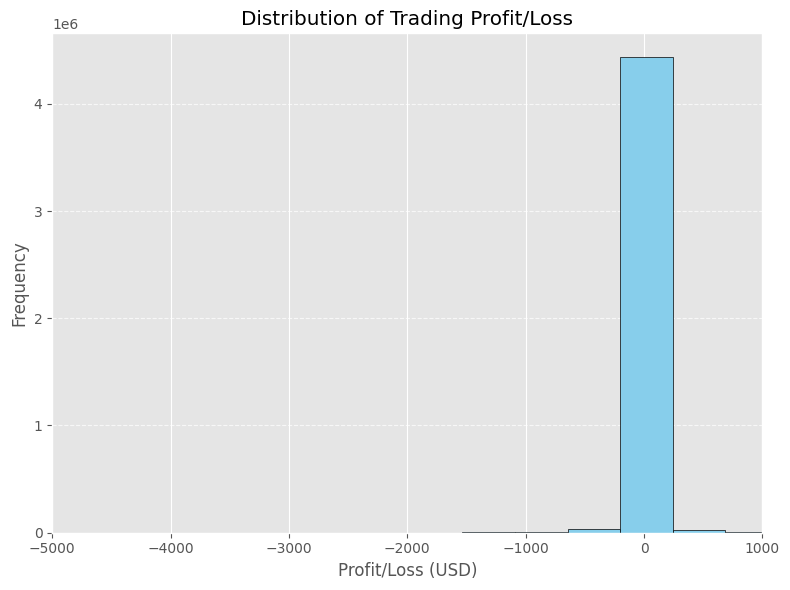

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(merged_usd_df['profit_usd'], bins=1000, color='skyblue', edgecolor='black')
plt.xlabel('Profit/Loss (USD)')
plt.ylabel('Frequency')
plt.title('Distribution of Trading Profit/Loss')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlim(-5000, 1000)
plt.tight_layout()

plt.show()

In [ ]:
merged_usd_df['open_time_datetime'] = pd.to_datetime(merged_usd_df['open_time_datetime'])

In [ ]:
print(merged_usd_df['open_time_datetime'].dtype)

datetime64[ns]


In [ ]:
merged_usd_df.drop(columns = ['open_time'], inplace=True)
merged_usd_df.drop(columns = ['close_time'], inplace=True)
print(merged_usd_df.head())

     ticket     login  symbol  cmd  volume  open_price  close_price       tp  \
0  67448384   7057066  XAUUSD    0   59.25     2064.90      2019.26  2094.52   
1  67448386   7057066  XAUUSD    0   59.25     2064.83      2019.26  2094.52   
2  68459401   7057066  XAUUSD    0   51.30     2056.60      2012.17  2085.07   
3  68459399   7057066  XAUUSD    0   51.30     2056.57      2012.17  2158.27   
4  64906125  88944670  XAUUSD    0   48.15     1978.91      1934.60  2017.00   

        sl  reason  commission  swaps     profit   volume_usd  \
0  2019.43       1         0.0    0.0 -270417.00  24198648.00   
1  2019.43       1         0.0    0.0 -270002.25  24198233.25   
2  2006.70       1         0.0    0.0 -227925.90  20872790.10   
3  1998.68       1         0.0    0.0 -227772.00  20872636.20   
4  1923.81       1         0.0    0.0 -213352.65  18843550.65   

  open_time_datetime close_time_datetime account_currency  profit_usd  
0         2024-01-02          2024-01-08              US

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
merged_usd_df['close_time'] = pd.to_datetime(merged_usd_df['close_time'], unit='s')
weekly_profit = merged_usd_df.groupby(pd.Grouper(key='close_time', freq='W-MON'))['profit_usd'].sum().reset_index()


fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(weekly_profit['close_time'], weekly_profit['profit_usd'], marker='o', color='skyblue')

ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))


ax.set_xlabel('Time')
ax.set_ylabel('Total Profit/Loss (USD)')
ax.set_title('Total Profit/Loss vs. Time')

ax.grid(True)

start_date = pd.Timestamp('2023-01-01')
end_date = pd.Timestamp('2024-03-31')
ax.set_xlim(start_date, end_date)

plt.xticks(rotation=90)

highest_profit = weekly_profit.loc[weekly_profit['profit_usd'].idxmax()]
lowest_profit = weekly_profit.loc[weekly_profit['profit_usd'].idxmin()]

ax.annotate(f'Highest: {highest_profit["profit_usd"]}',
            xy=(highest_profit['close_time'], highest_profit['profit_usd']),
            xytext=(20, 20),
            textcoords='offset points',
            arrowprops=dict(arrowstyle='->', color='green'))

ax.annotate(f'Lowest: {lowest_profit["profit_usd"]}',
            xy=(lowest_profit['close_time'], lowest_profit['profit_usd']),
            xytext=(20, 30),
            textcoords='offset points',
            arrowprops=dict(arrowstyle='->', color='red'))

plt.tight_layout()

plt.show()

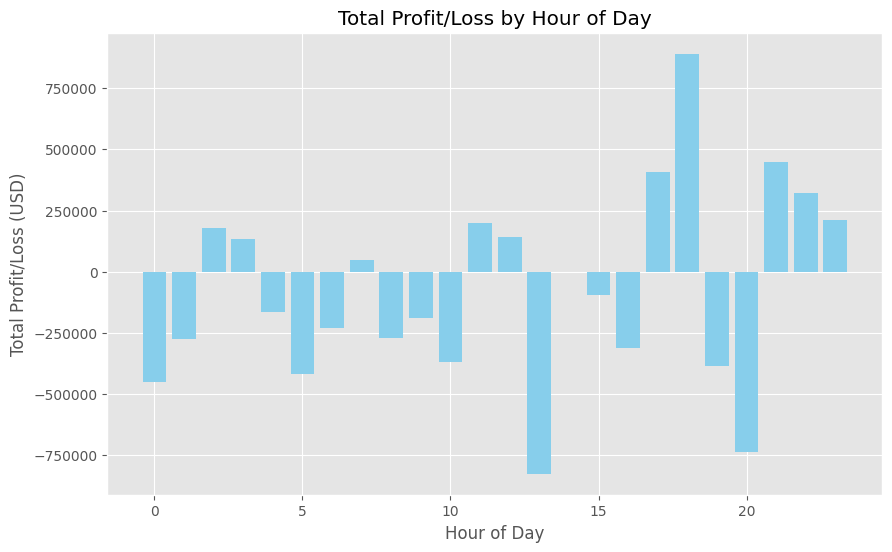

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

merged_usd_df['close_time'] = pd.to_datetime(merged_usd_df['close_time'], unit='s')

hourly_profit = merged_usd_df.groupby(merged_usd_df['close_time'].dt.hour)['profit_usd'].sum()

plt.figure(figsize=(10, 6))
plt.bar(hourly_profit.index, hourly_profit.values, color='skyblue')

plt.xlabel('Hour of Day')
plt.ylabel('Total Profit/Loss (USD)')
plt.title('Total Profit/Loss by Hour of Day')

plt.grid(True)
plt.show()


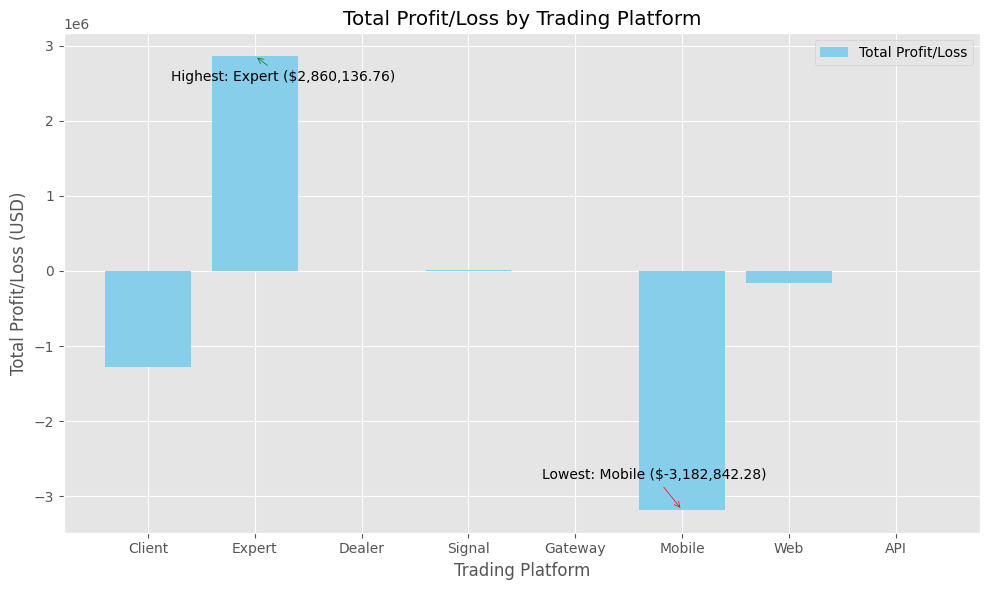

In [ ]:
profit_by_platform = merged_usd_df.groupby('reason')['profit_usd'].sum()

reason_map = {
    0: 'Client',
    1: 'Expert',
    2: 'Dealer',
    3: 'Signal',
    4: 'Gateway',
    5: 'Mobile',
    6: 'Web',
    7: 'API'
}


profit_by_platform.index = profit_by_platform.index.map(reason_map)

plt.figure(figsize=(10, 6))
plt.bar(profit_by_platform.index, profit_by_platform.values, color='skyblue')

highest_platform = profit_by_platform.idxmax()
highest_profit = profit_by_platform.max()
lowest_platform = profit_by_platform.idxmin()
lowest_profit = profit_by_platform.min()

plt.xlabel('Trading Platform')
plt.ylabel('Total Profit/Loss (USD)')
plt.title('Total Profit/Loss by Trading Platform')
plt.legend(['Total Profit/Loss'])

plt.annotate(f'Highest: {highest_platform} (${highest_profit:,.2f})',
             xy=(highest_platform, highest_profit),
             xytext=(20, -20),
             textcoords='offset points',
             ha='center', va='bottom',
             arrowprops=dict(arrowstyle='->', color='green'))

plt.annotate(f'Lowest: {lowest_platform} (${lowest_profit:,.2f})',
             xy=(lowest_platform, lowest_profit),
             xytext=(-20, 20),
             textcoords='offset points',
             ha='center', va='bottom',
             arrowprops=dict(arrowstyle='->', color='red'))

plt.grid(True)
plt.tight_layout()
plt.show()


# 2

In [ ]:
merged_usd_df = pd.read_csv("/content/drive/MyDrive/AI capstone/dataset_updated/merged_usd_profit.csv")
print(merged_usd_df.head())

     ticket     login  symbol  cmd  volume   open_time  open_price  \
0  67448384   7057066  XAUUSD    0   59.25  1704224026     2064.90   
1  67448386   7057066  XAUUSD    0   59.25  1704224028     2064.83   
2  68459401   7057066  XAUUSD    0   51.30  1706822869     2056.60   
3  68459399   7057066  XAUUSD    0   51.30  1706822866     2056.57   
4  64906125  88944670  XAUUSD    0   48.15  1697792473     1978.91   

   close_time  close_price       tp       sl  reason  commission  swaps  \
0  1704719914      2019.26  2094.52  2019.43       1         0.0    0.0   
1  1704719914      2019.26  2094.52  2019.43       1         0.0    0.0   
2  1707760417      2012.17  2085.07  2006.70       1         0.0    0.0   
3  1707760418      2012.17  2158.27  1998.68       1         0.0    0.0   
4  1699648983      1934.60  2017.00  1923.81       1         0.0    0.0   

      profit   volume_usd open_time_datetime close_time_datetime  \
0 -270417.00  24198648.00         2024-01-02          2024-0

In [ ]:
tp_0_records = merged_usd_df[merged_usd_df['tp'] == 0].head(10)
print("Records with tp = 0:")
print(tp_0_records)

tp_1_records = merged_usd_df[merged_usd_df['tp'] == 1].head(10)
print("\nRecords with tp = 1:")
print(tp_1_records)

Records with tp = 0:
      ticket   login symbol  cmd  volume   open_time  open_price  close_time  \
26  60254584  804444   HK50    0   49.96  1684858203    19392.68  1685477302   
33  60254460  804444   HK50    0   49.99  1684904572    19191.66  1685477777   
36  57929049  771283  GER30    1   40.00  1677854272    15485.44  1677872898   
42  57929041  771283  GER30    1   40.00  1677854264    15486.13  1677872948   
44  60254498  804444   HK50    0   49.99  1684922390    19111.96  1685478514   
53  60256527  804444   HK50    0   49.99  1684923745    19065.06  1685480496   
58  61454488  779148   DJ30    0    2.00  1690472688    35718.41  1696813206   
59  61576856  779148   DJ30    0    2.00  1690924903    35686.17  1696813206   
60  61453556  779148   DJ30    0    2.00  1690472071    35682.71  1696813206   
63  60256587  804444   HK50    0   24.98  1684816603    19747.43  1685508360   

    close_price   tp   sl  reason  commission    swaps    profit  \
26     18277.35  0.0  0.0     

In [ ]:
cmd_0_data = merged_usd_df[merged_usd_df['cmd'] == 0]

total_profit_cmd_0 = cmd_0_data['profit'].sum()

print("总盈利量（当 cmd=0 时）：", total_profit_cmd_0)

cmd_1_data = merged_usd_df[merged_usd_df['cmd'] == 1]

total_profit_cmd_1 = cmd_1_data['profit'].sum()

print("总盈利量（当 cmd=1 时）：", total_profit_cmd_1)

总盈利量（当 cmd=0 时）： 1949620.6100000404
总盈利量（当 cmd=1 时）： -3901180.849999996


In [ ]:
win_df = merged_usd_df[merged_usd_df['profit_usd'] > 0]

In [ ]:
win_df.to_csv('/content/drive/MyDrive/AI capstone/dataset_updated/win.csv', index=False)

In [ ]:
average_profit = win_df['profit_usd'].mean()
print("average win: ", average_profit)
median_profit = win_df['profit_usd'].median()
print("median win: ", median_profit)

average win:  23.752452876629704
median win:  2.0596965000000003


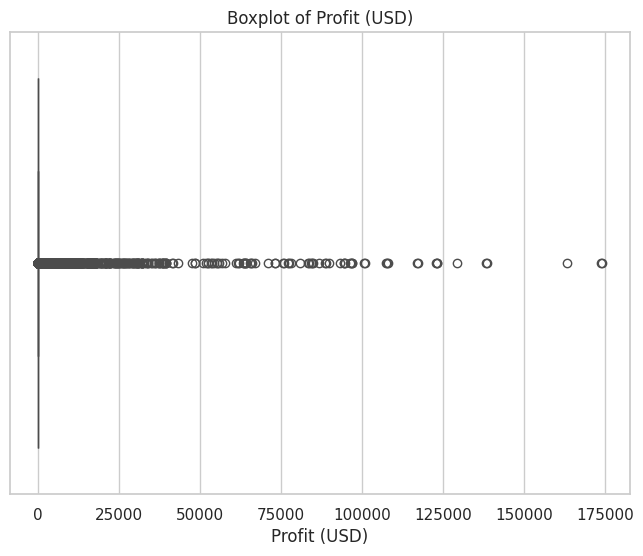

In [ ]:
# profit usd box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=win_df['profit_usd'])
plt.title('Boxplot of Profit (USD)')
plt.xlabel('Profit (USD)')
plt.show()

In [ ]:
data_types = merged_usd_df.dtypes

numerical_features = []
categorical_features = []

for feature, data_type in data_types.items():
    if data_type == 'object':
        categorical_features.append(feature)
    else:
        numerical_features.append(feature)

print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)


Numerical Features: ['ticket', 'login', 'cmd', 'volume', 'open_time', 'open_price', 'close_time', 'close_price', 'tp', 'sl', 'reason', 'commission', 'swaps', 'profit', 'volume_usd', 'profit_usd']
Categorical Features: ['symbol', 'open_time_datetime', 'close_time_datetime', 'account_currency']


In [ ]:
numer_df = pd.DataFrame()

In [ ]:
numer_df['ticket'] = merged_usd_df['ticket']
numer_df['volume'] = merged_usd_df['volume']
numer_df['open_time'] = merged_usd_df['open_time']
numer_df['open_price'] = merged_usd_df['open_price']
numer_df['close_time'] = merged_usd_df['close_time']
numer_df['close_price'] = merged_usd_df['close_price']
numer_df['commission'] = merged_usd_df['commission']
numer_df['swaps'] = merged_usd_df['swaps']
numer_df['volume_usd'] = merged_usd_df['volume_usd']
numer_df['profit_usd'] = merged_usd_df['profit_usd']


In [ ]:
numer_df.to_csv('/content/drive/MyDrive/AI capstone/dataset_updated/mycsv/my_dataframe.csv', index=False)

In [ ]:
print(numer_df.head())

     ticket  volume   open_time  open_price  close_time  close_price  \
0  67448384   59.25  1704224026     2064.90  1704719914      2019.26   
1  67448386   59.25  1704224028     2064.83  1704719914      2019.26   
2  68459401   51.30  1706822869     2056.60  1707760417      2012.17   
3  68459399   51.30  1706822866     2056.57  1707760418      2012.17   
4  64906125   48.15  1697792473     1978.91  1699648983      1934.60   

   commission  swaps   volume_usd  profit_usd  
0         0.0    0.0  24198648.00  -270417.00  
1         0.0    0.0  24198233.25  -270002.25  
2         0.0    0.0  20872790.10  -227925.90  
3         0.0    0.0  20872636.20  -227772.00  
4         0.0    0.0  18843550.65  -213352.65  


numer_df preprocessing

In [ ]:
missing_values = numer_df.isna().sum()
print(missing_values)

ticket         0
volume         0
open_time      0
open_price     0
close_time     0
close_price    0
commission     0
swaps          0
volume_usd     0
profit_usd     0
dtype: int64


In [ ]:
duplicate_rows = numer_df.duplicated(keep='first')
duplicate_rows = numer_df[duplicate_rows]
print(duplicate_rows)

Empty DataFrame
Columns: [ticket, volume, open_time, open_price, close_time, close_price, commission, swaps, volume_usd, profit_usd]
Index: []


In [ ]:
numer_df['action_time'] = numer_df['close_time'] - numer_df['open_time']

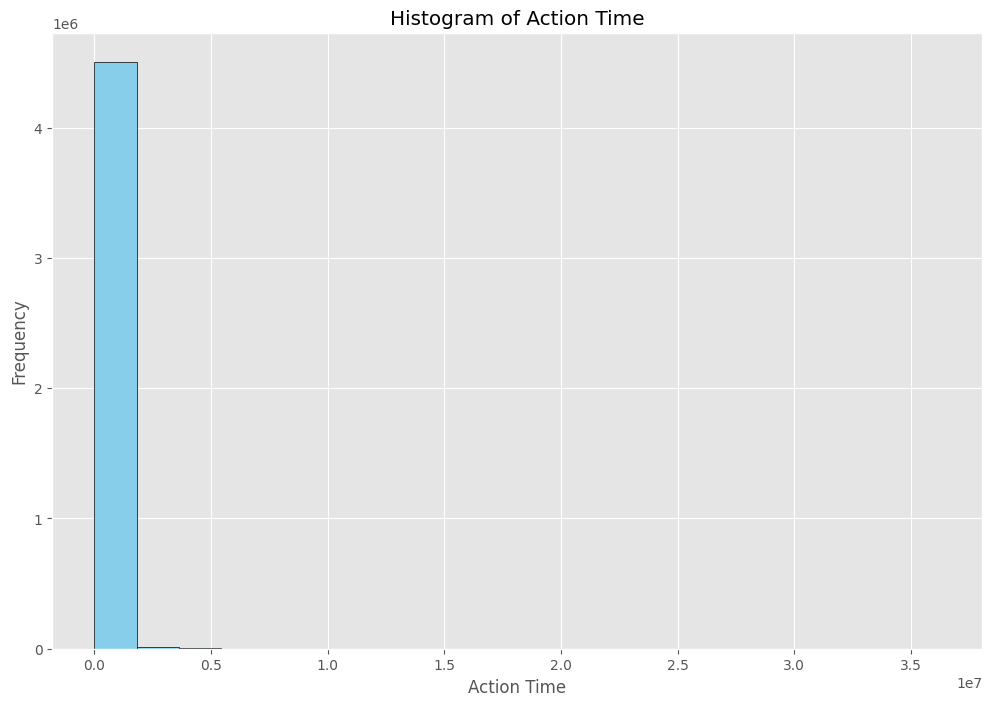

In [ ]:
plt.hist(numer_df['action_time'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Action Time')
plt.xlabel('Action Time')
plt.ylabel('Frequency')
plt.show()

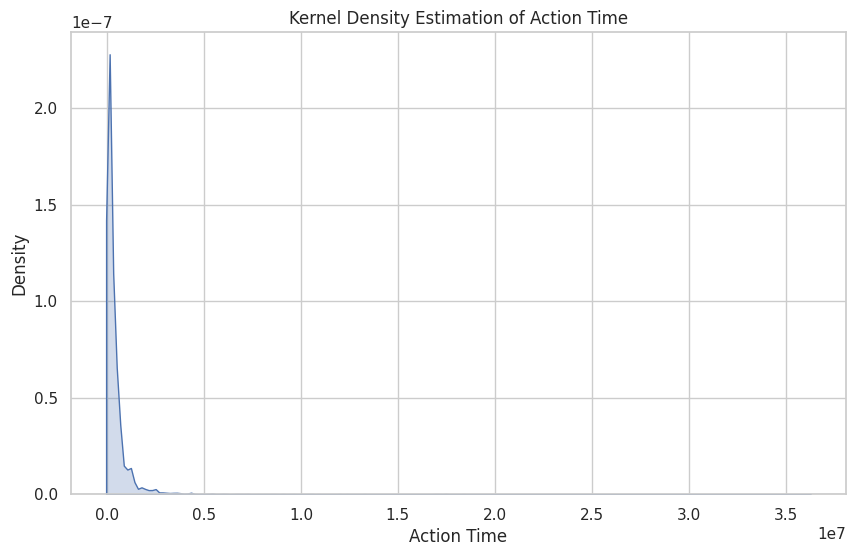

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.kdeplot(numer_df['action_time'], fill=True)
plt.title('Kernel Density Estimation of Action Time')
plt.xlabel('Action Time')
plt.ylabel('Density')
plt.show()

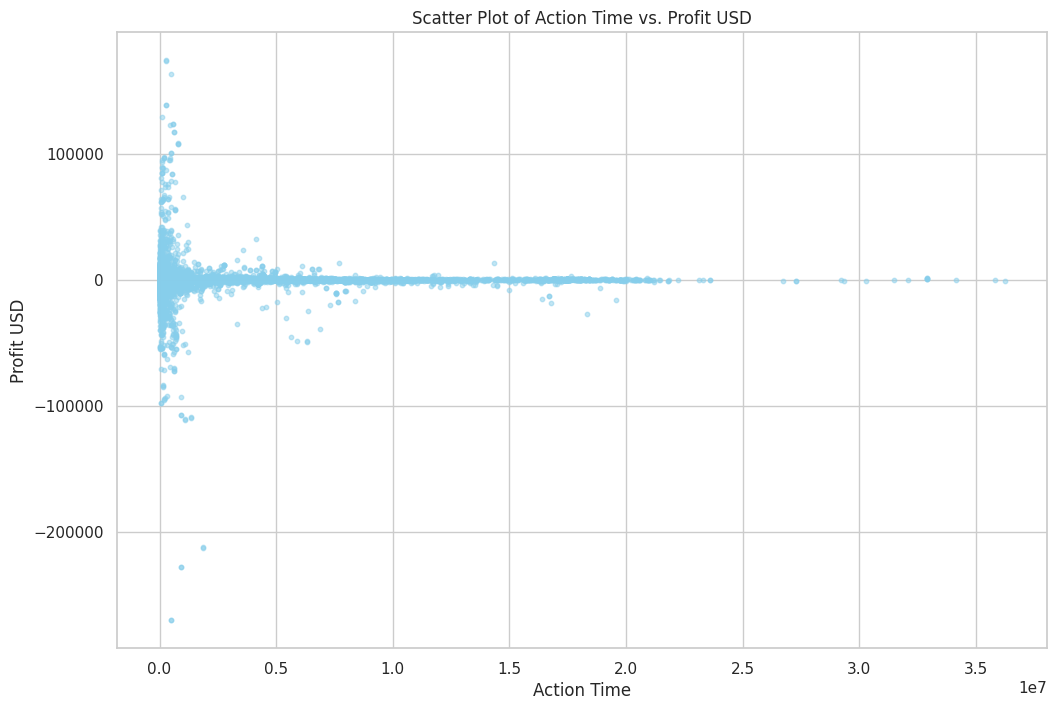

In [ ]:
plt.scatter(numer_df['action_time'], numer_df['profit_usd'], color='skyblue', alpha=0.5, s=10)

plt.title('Scatter Plot of Action Time vs. Profit USD')
plt.xlabel('Action Time')
plt.ylabel('Profit USD')

plt.show()

number of outliers: 38468


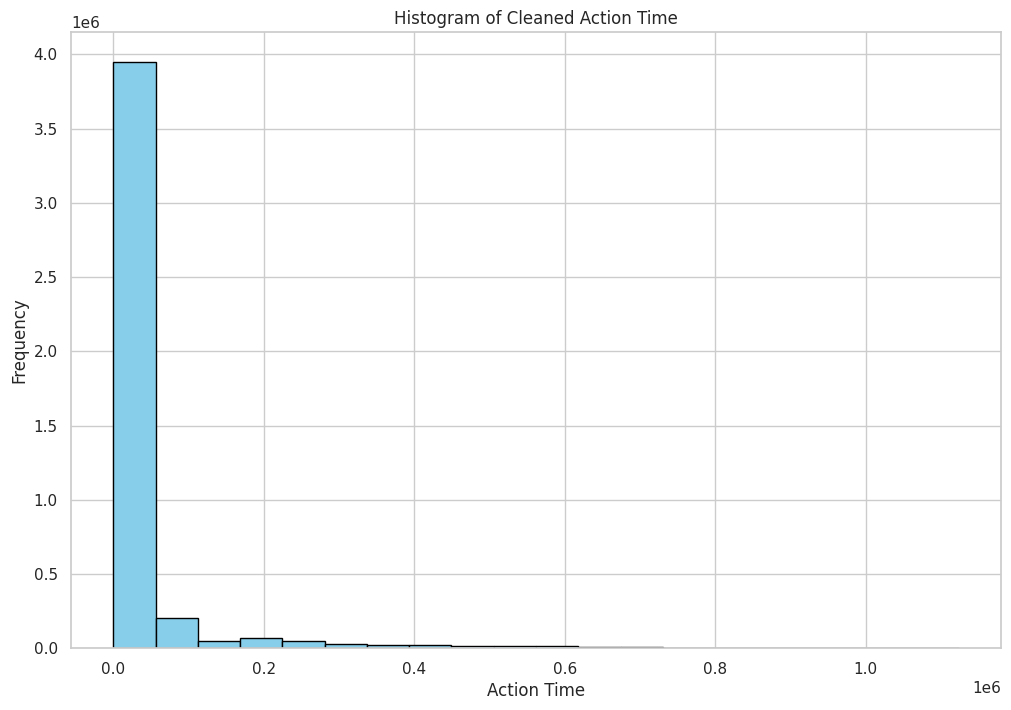

In [ ]:
action_time_mean = numer_df['action_time'].mean()
action_time_std = numer_df['action_time'].std()


action_time_lower_bound = action_time_mean - 3 * action_time_std
action_time_upper_bound = action_time_mean + 3 * action_time_std
numer_df['action_time_outlier'] = np.where((numer_df['action_time'] < action_time_lower_bound) | (numer_df['action_time'] > action_time_upper_bound), 1, 0)
numer_df_cleaned = numer_df[numer_df['action_time_outlier'] == 0]
print("number of outliers:", numer_df[numer_df['action_time_outlier'] == 1].shape[0])

plt.hist(numer_df_cleaned['action_time'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Cleaned Action Time')
plt.xlabel('Action Time')
plt.ylabel('Frequency')
plt.show()

heatmap

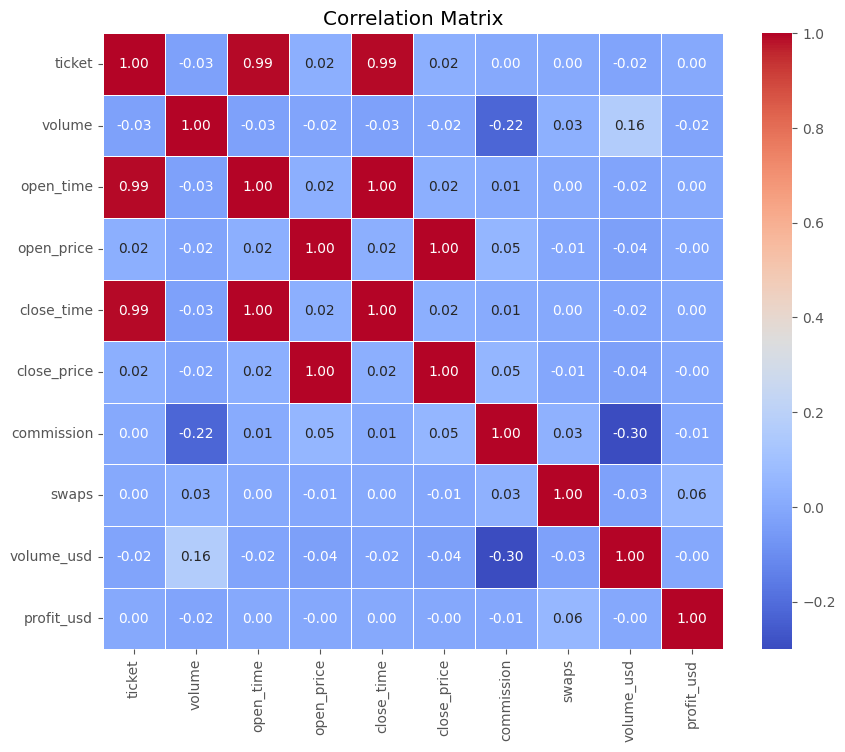

In [ ]:
correlation_matrix = numer_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
cate_df = pd.DataFrame()
cate_df['ticket'] = merged_usd_df['ticket']
cate_df['login'] = merged_usd_df['login']
cate_df['tp'] = merged_usd_df['tp']
cate_df['sl'] = merged_usd_df['sl']
cate_df['reason'] = merged_usd_df['reason']
cate_df['symbol'] = merged_usd_df['symbol']
cate_df['account_currency'] = merged_usd_df['account_currency']


In [ ]:
cate_df.to_csv('/content/drive/MyDrive/AI capstone/dataset_updated/mycsv/cate_feature.csv', index=False)

In [ ]:
trades_df = pd.read_csv("/content/drive/MyDrive/AI capstone/dataset_updated/trades.csv")
print(trades_df.head())

     ticket     login  symbol  cmd  volume   open_time  open_price  \
0  68880703   7062462  XAUUSD    0    0.01  1707843941  1991.35000   
1  68880910   7062462  XAUUSD    0    0.02  1707844129  1990.30000   
2  68120690    813125  US2000    0    1.00  1706083005  1983.22000   
3  68169249    813125  US2000    0    2.00  1706139371  1960.62000   
4  68186877  88945036  NZDUSD    0    0.13  1706169600     0.61062   

   close_time  close_price          tp          sl  reason  commission  swaps  \
0  1708013114   2003.01000     0.00000     0.00000       1        0.00  -1.12   
1  1708013110   2002.76000     0.00000     0.00000       1        0.00  -2.25   
2  1706114503   1996.68000  2012.34000  1980.03000       1        0.00   0.00   
3  1706200143   1991.51000  2331.85000  1958.94000       1        0.00  -7.21   
4  1706197106      0.61317     0.61312     0.55059       1       -0.91   0.00   

   profit  volume_usd  
0   10.83     3994.36  
1   23.16     7986.12  
2  105.42    39799.0

In [ ]:
login_df = pd.read_csv("/content/drive/MyDrive/AI capstone/dataset_updated/login.csv")
print(login_df.head())

    login  country account_currency    reg_date
0  457547  Romania              EUR  1614212132
1  474589       CA              CAD  1609987442
2  504321       CA              CAD  1602642710
3  504322       CA              USD  1602736545
4  504326       CA              USD  1603093152


In [ ]:
profit_login_df = pd.merge(merged_usd_profit_df, login_df, on='login', how='inner')
print(profit_login_df.head())

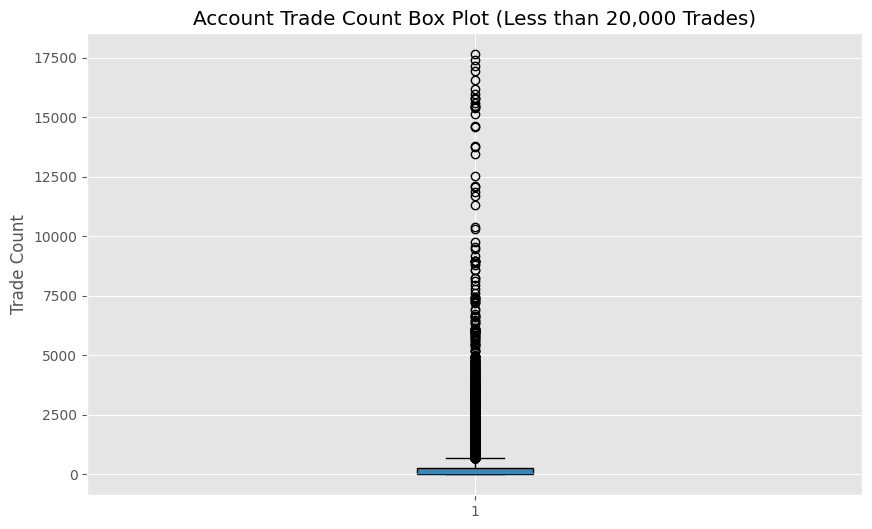

In [ ]:
trade_count_by_user = trades_df.groupby('login').size()
filtered_trade_counts = trade_count_by_user[trade_count_by_user < 20000]

plt.figure(figsize=(10, 6))
plt.boxplot(filtered_trade_counts, vert=True, patch_artist=True)
plt.title('Account Trade Count Box Plot (Less than 20,000 Trades)')
plt.ylabel('Trade Count')
plt.show()

In [ ]:
Q1 = trade_count_by_user.quantile(0.25)
Q3 = trade_count_by_user.quantile(0.75)
IQR = Q3 - Q1

outliers_condition = ((trade_count_by_user < (Q1 - 1.5 * IQR)) | (trade_count_by_user > (Q3 + 1.5 * IQR)))
outliers_count = trade_count_by_user[outliers_condition].count()
outliers_ratio = outliers_count / len(trade_count_by_user)

print(f"离群点的比例为: {outliers_ratio:.2%}")


离群点的比例为: 12.73%


In [ ]:
account_trade_counts = profit_login_df['login'].value_counts().reset_index()
account_trade_counts.columns = ['login', 'trade_count']
profit_login_df = profit_login_df.merge(account_trade_counts, on='login')
Q1 = account_trade_counts['trade_count'].quantile(0.25)
Q3 = account_trade_counts['trade_count'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
profit_login_df['is_outlier'] = (profit_login_df['trade_count'] < lower_bound) | (profit_login_df['trade_count'] > upper_bound)

outliers_profit = profit_login_df[profit_login_df['is_outlier']]['profit']
non_outliers_profit = profit_login_df[~profit_login_df['is_outlier']]['profit']

mean_profit_outliers = outliers_profit.mean()
mean_profit_non_outliers = non_outliers_profit.mean()
median_profit_outliers = outliers_profit.median()
median_profit_non_outliers = non_outliers_profit.median()


In [ ]:
print(Q1)
median_trades = profit_login_df.groupby('login').size().median()
print(median_trades)
print(Q3)

14.0
63.0
276.0


In [ ]:
account_summary = profit_login_df.groupby('login').agg(
    total_profit_usd=('profit_usd', 'sum'),
    total_volume_usd=('volume_usd', 'sum')
)
account_summary['DPM'] = account_summary['total_profit_usd'] / (account_summary['total_volume_usd'] / 1_000_000)

account_summary = account_summary.reset_index()
login_df_with_dpm = pd.merge(login_df, account_summary[['login', 'DPM']], on='login', how='left')
print(login_df_with_dpm.head(100))


     login  country account_currency    reg_date          DPM
0   457547  Romania              EUR  1614212132          NaN
1   474589       CA              CAD  1609987442          NaN
2   504321       CA              CAD  1602642710          NaN
3   504322       CA              USD  1602736545          NaN
4   504326       CA              USD  1603093152    -0.113858
..     ...      ...              ...         ...          ...
95  504515       CA              CAD  1608011304 -1006.422670
96  504518       CA              CAD  1608085873          NaN
97  504520       CA              CAD  1608085886          NaN
98  504521       CA              CAD  1608091818          NaN
99  504524       CA              CAD  1608256670          NaN

[100 rows x 5 columns]


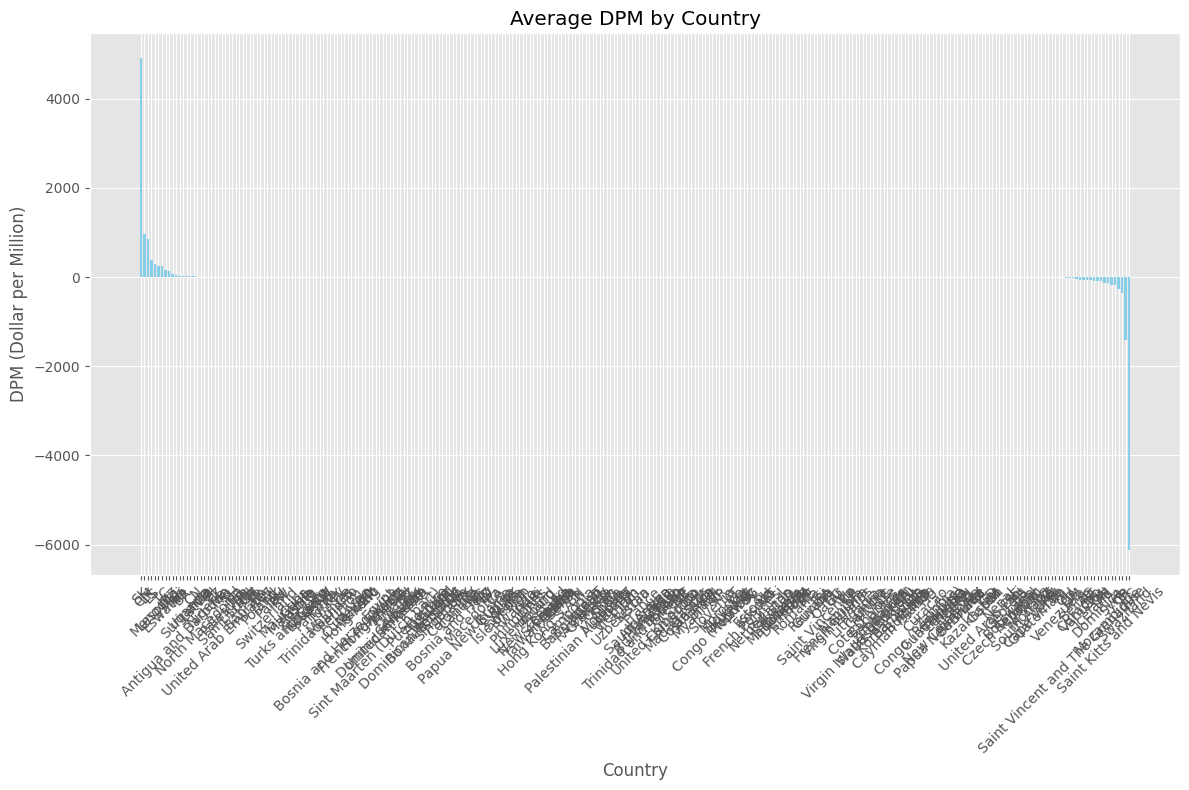

In [ ]:
country_dpm_data = profit_login_df.groupby('country').agg(
    total_profit_usd=('profit_usd', 'sum'),
    total_volume_usd=('volume_usd', 'sum')
).reset_index()

country_dpm_data['DPM'] = country_dpm_data['total_profit_usd'] / (country_dpm_data['total_volume_usd'] / 1_000_000)

country_dpm_sorted = country_dpm_data.sort_values(by='DPM', ascending=False)

plt.figure(figsize=(12, 8))
plt.bar(country_dpm_sorted['country'], country_dpm_sorted['DPM'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('DPM (Dollar per Million)')
plt.title('Average DPM by Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
login_df_with_dpm = login_df_with_dpm.dropna(subset=['DPM'])
print(login_df_with_dpm.head())

     login country account_currency    reg_date       DPM
4   504326      CA              USD  1603093152 -0.113858
8   504336      CI              USD  1603609255 -2.671539
16  504357      CA              CAD  1604371326 -0.020358
18  504359      CA              CAD  1604456304 -0.003583
20  504361      CA              USD  1604459164 -0.190902


# load

In [ ]:
login_df_with_dpm = pd.read_csv("/content/drive/MyDrive/AI capstone/dataset_updated/mycsv/login_df_with_dpm.csv")
print(login_df_with_dpm.head())

    login  country account_currency    reg_date       DPM
0  457547  Romania              EUR  1614212132       NaN
1  474589       CA              CAD  1609987442       NaN
2  504321       CA              CAD  1602642710       NaN
3  504322       CA              USD  1602736545       NaN
4  504326       CA              USD  1603093152 -0.113858


In [ ]:
merged_usd_profit = pd.read_csv("/content/drive/MyDrive/AI capstone/dataset_updated/merged_usd_profit.csv")

In [ ]:
merged_usd_profit = pd.merge(merged_usd_profit, login_df_with_dpm[['login', 'country', 'reg_date']], on='login', how='left')

In [ ]:
del merged_usd_profit

In [ ]:
print(merged_usd_profit.dtypes)

ticket                   int64
login                    int64
symbol                  object
cmd                      int64
volume                 float64
open_time                int64
open_price             float64
close_time               int64
close_price            float64
tp                     float64
sl                     float64
reason                   int64
commission             float64
swaps                  float64
profit                 float64
volume_usd             float64
open_time_datetime      object
close_time_datetime     object
account_currency        object
profit_usd             float64
country                 object
reg_date                 int64
dtype: object


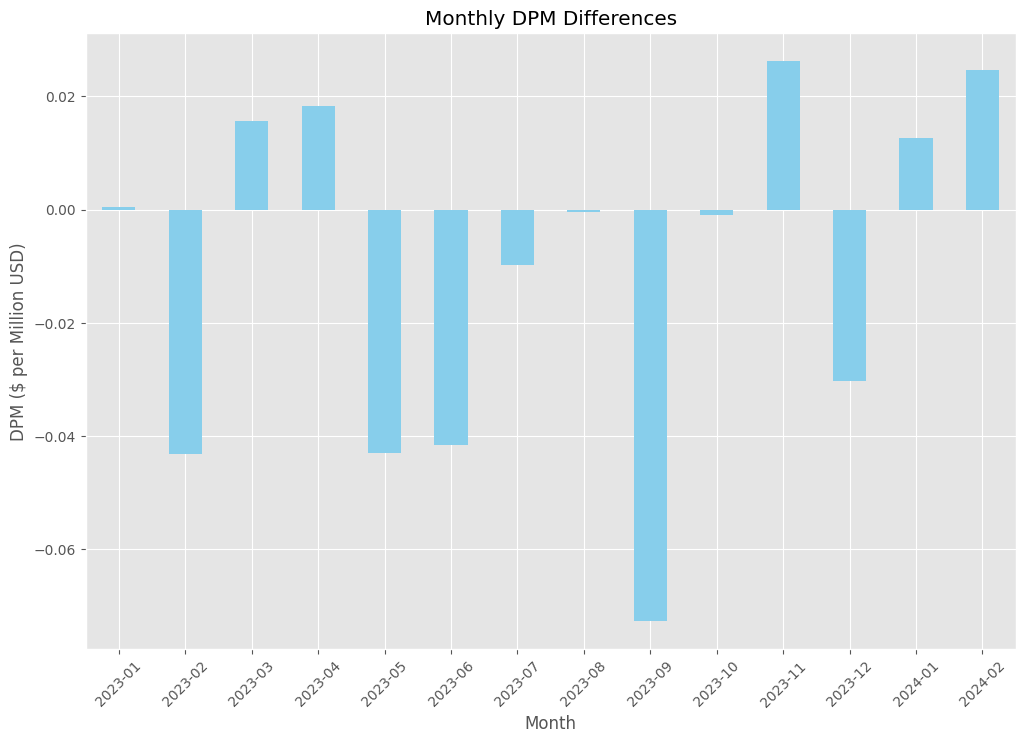

In [ ]:
merged_usd_profit['open_time_datetime'] = pd.to_datetime(merged_usd_profit['open_time'], unit='s')

merged_usd_profit['month'] = merged_usd_profit['open_time_datetime'].dt.to_period('M')

monthly_summary = merged_usd_profit.groupby('month').agg(
    total_profit_usd=('profit_usd', 'sum'),
    total_volume_usd=('volume_usd', 'sum')
)

monthly_summary['DPM'] = monthly_summary['total_profit_usd'] / (monthly_summary['total_volume_usd'] / 1_000_000)


monthly_summary['DPM'].plot(kind='bar', color='skyblue')
plt.title('Monthly DPM Differences')
plt.xlabel('Month')
plt.ylabel('DPM ($ per Million USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


<ipython-input-157-e0b82546de24>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['open_time_datetime'] = pd.to_datetime(filtered_data['open_time'], unit='s')
<ipython-input-157-e0b82546de24>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['month'] = filtered_data['open_time_datetime'].dt.to_period('M')


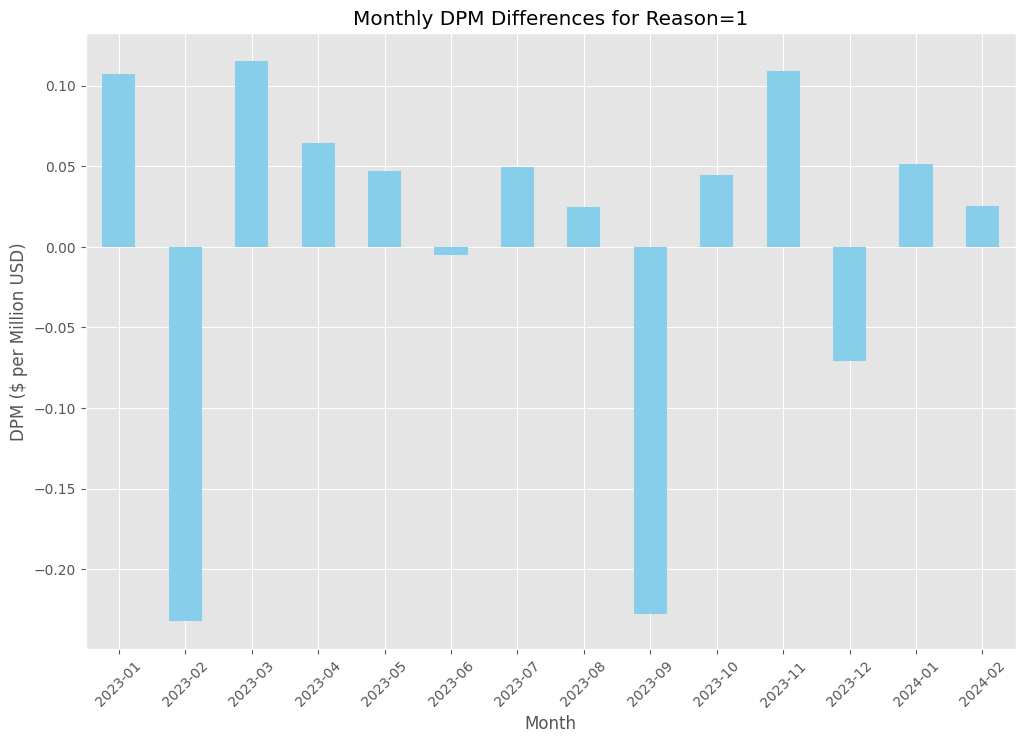

In [ ]:
filtered_data = merged_usd_profit[merged_usd_profit['reason'] == 1]
filtered_data['open_time_datetime'] = pd.to_datetime(filtered_data['open_time'], unit='s')
filtered_data['month'] = filtered_data['open_time_datetime'].dt.to_period('M')

monthly_summary_filtered = filtered_data.groupby('month').agg(
    total_profit_usd=('profit_usd', 'sum'),
    total_volume_usd=('volume_usd', 'sum')
)


monthly_summary_filtered['DPM'] = monthly_summary_filtered['total_profit_usd'] / monthly_summary_filtered['total_volume_usd'] * 1_000_000
monthly_summary_filtered['DPM'].plot(kind='bar', color='skyblue')
plt.title('Monthly DPM Differences for Reason=1')
plt.xlabel('Month')
plt.ylabel('DPM ($ per Million USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


<ipython-input-163-a0053eb4eeb7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_r5['open_time_datetime'] = pd.to_datetime(filtered_data_r5['open_time'], unit='s')
<ipython-input-163-a0053eb4eeb7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_r5['month'] = filtered_data_r5['open_time_datetime'].dt.to_period('M')


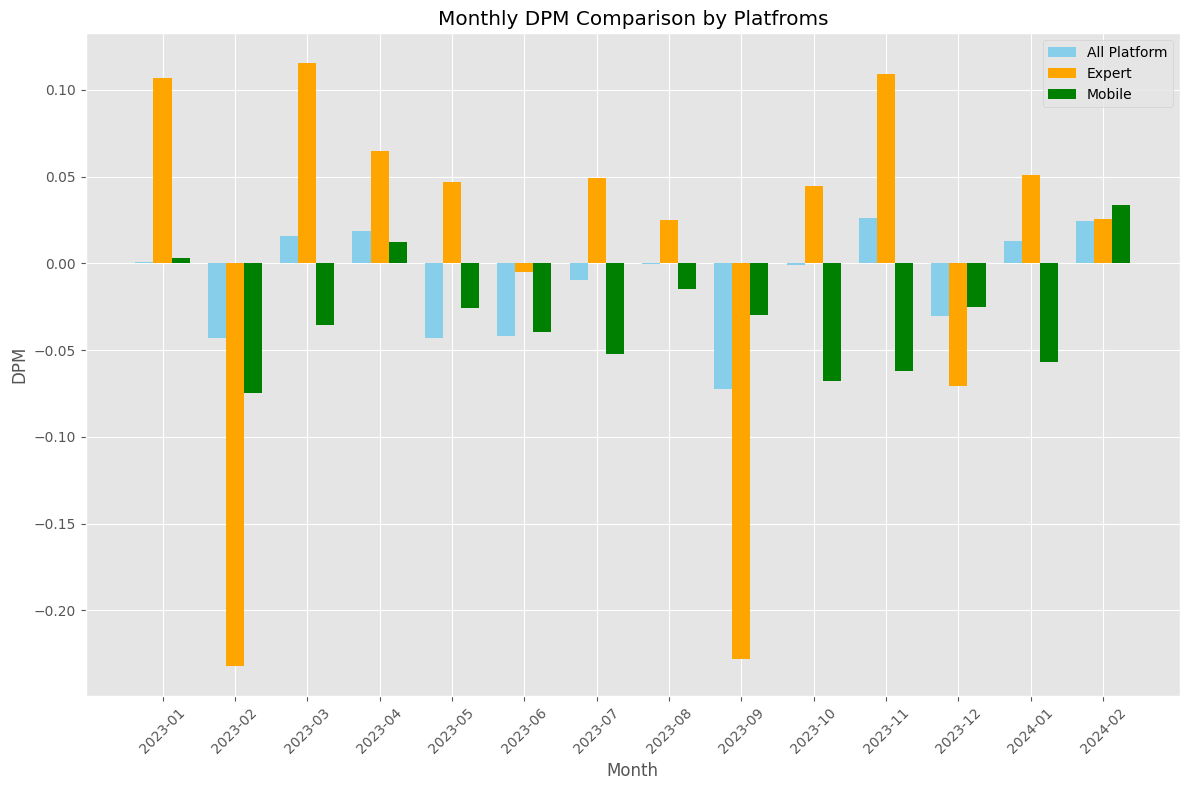

In [ ]:

filtered_data_r5 = merged_usd_profit[merged_usd_profit['reason'] == 5]
filtered_data_r5['open_time_datetime'] = pd.to_datetime(filtered_data_r5['open_time'], unit='s')
filtered_data_r5['month'] = filtered_data_r5['open_time_datetime'].dt.to_period('M')

monthly_summary_r5 = filtered_data_r5.groupby('month').agg(
    total_profit_usd=('profit_usd', 'sum'),
    total_volume_usd=('volume_usd', 'sum')
)
monthly_summary_r5['DPM'] = monthly_summary_r5['total_profit_usd'] / monthly_summary_r5['total_volume_usd'] * 1_000_000
combined_summary = pd.DataFrame({
    'All Platform': monthly_summary['DPM'],
    'Expert': monthly_summary_filtered['DPM'],
    'Mobile': monthly_summary_r5['DPM']
})


combined_summary.reset_index(inplace=True)
plt.figure(figsize=(12, 8))


bar_width = 0.25
index = np.arange(len(combined_summary['month']))


plt.bar(index, combined_summary['All Platform'], bar_width, label='All Platform', color='skyblue')
plt.bar(index + bar_width, combined_summary['Expert'], bar_width, label='Expert', color='orange')
plt.bar(index + 2 * bar_width, combined_summary['Mobile'], bar_width, label='Mobile', color='green')

plt.xlabel('Month')
plt.ylabel('DPM')
plt.title('Monthly DPM Comparison by Platfroms')
plt.xticks(index + bar_width, combined_summary['month'].dt.strftime('%Y-%m'), rotation=45)

plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()


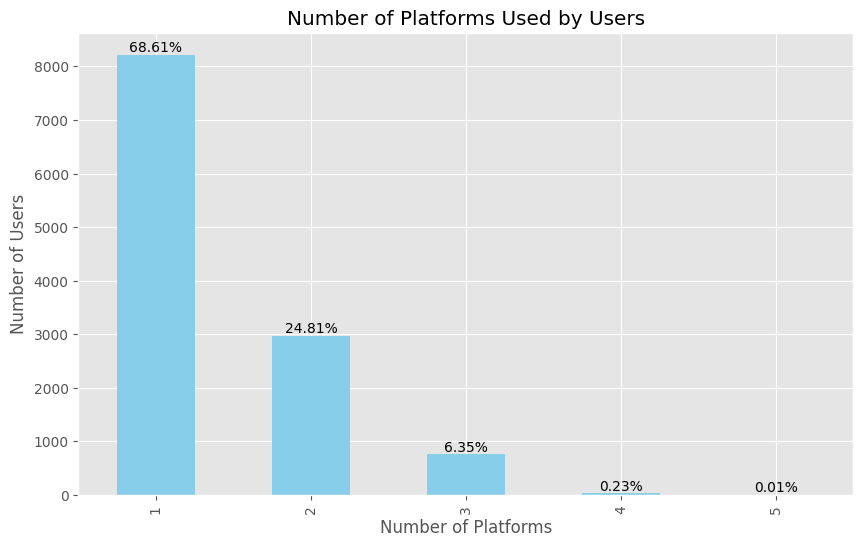

In [ ]:
platform_counts = user_platform_count['platform_count'].value_counts()

total_users = platform_counts.sum()
percentages = (platform_counts / total_users * 100).round(2)  # Round to 2 decimal places

plt.figure(figsize=(10, 6))
ax = platform_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Platforms Used by Users')
plt.xlabel('Number of Platforms')
plt.ylabel('Number of Users')

for i, value in enumerate(platform_counts):
    ax.text(i, value, f'{percentages.iloc[i]}%', ha='center', va='bottom')

plt.show()



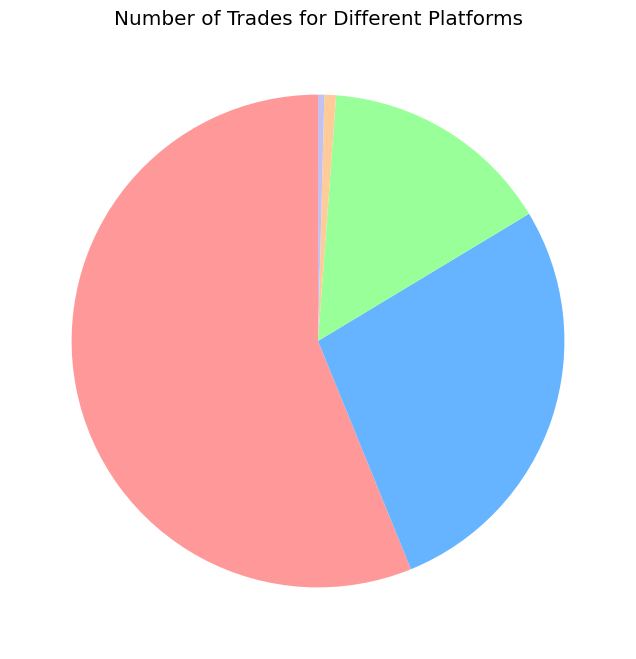

In [ ]:
platform_map = {
    0: 'Client',
    1: 'Expert',
    2: 'Dealer',
    3: 'Signal',
    4: 'Gateway',
    5: 'Mobile',
    6: 'Web',
    7: 'API'
}

platform_counts = merged_usd_df['reason'].map(platform_map).value_counts()

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#c2c2f0'][:len(platform_counts)]

plt.figure(figsize=(8, 8))
plt.pie(platform_counts, labels=None, colors=colors, startangle=90)

plt.title('Number of Trades for Different Platforms')

plt.show()


In [ ]:
platform_map = {
    0: 'Client',
    1: 'Expert',
    2: 'Dealer',
    3: 'Signal',
    4: 'Gateway',
    5: 'Mobile',
    6: 'Web',
    7: 'API'
}

platform_counts = merged_usd_df['reason'].map(platform_map).value_counts()

total_trades = platform_counts.sum()

platform_summary = pd.DataFrame({
    'Platform': platform_counts.index,
    'Number of Trades': platform_counts.values,
    'Percentage': (platform_counts / total_trades * 100).round(2)
})

platform_summary.set_index('Platform', inplace=True)

print(platform_summary)


          Number of Trades  Percentage
Platform                              
Expert             2539287       56.16
Mobile             1242458       27.48
Client              687011       15.19
Web                  34354        0.76
Signal               18523        0.41
Gateway                126        0.00
Dealer                  15        0.00
API                      3        0.00


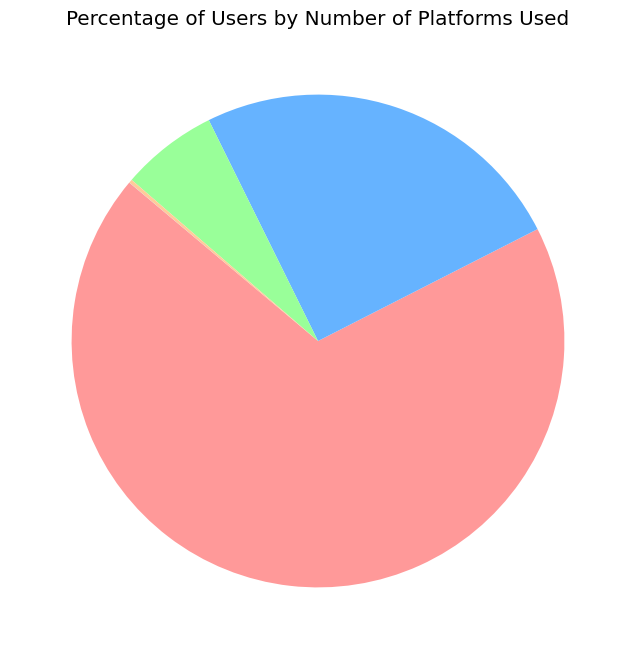

In [ ]:
import matplotlib.pyplot as plt

platform_count_distribution = user_platform_count['platform_count'].value_counts(normalize=True)
data = platform_count_distribution.values
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#c2c2f0'][:len(data)]

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(data, colors=colors, startangle=140)

plt.title('Percentage of Users by Number of Platforms Used')
plt.show()


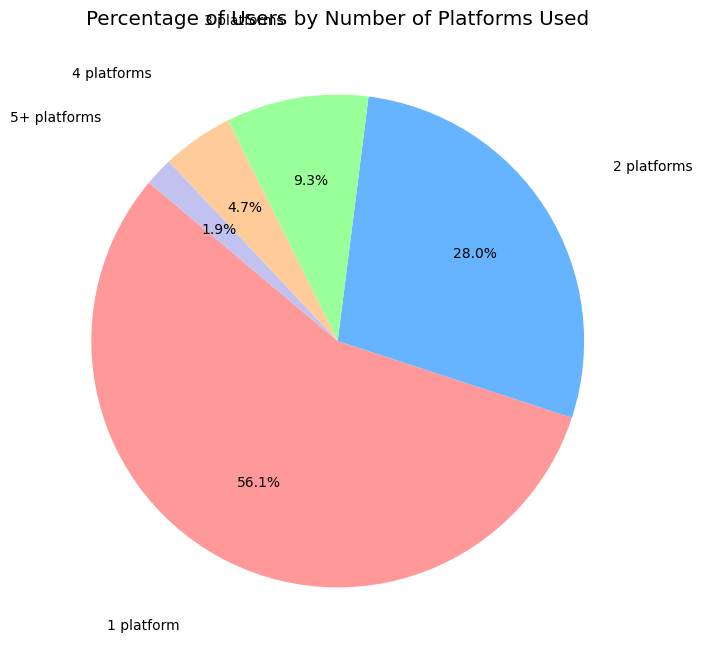

In [ ]:
import matplotlib.pyplot as plt

data = [300, 150, 50, 25, 10]
labels = ['1 platform', '2 platforms', '3 platforms', '4 platforms', '5+ platforms']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#c2c2f0']

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(data, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

for text, autotext in zip(texts, autotexts):
    x, y = text.get_position()
    text.set_position((x * 1.2, y * 1.2))
    auto_x, auto_y = autotext.get_position()
    autotext.set_position((auto_x * 1.1, auto_y * 1.1))

plt.title('Percentage of Users by Number of Platforms Used')
plt.show()


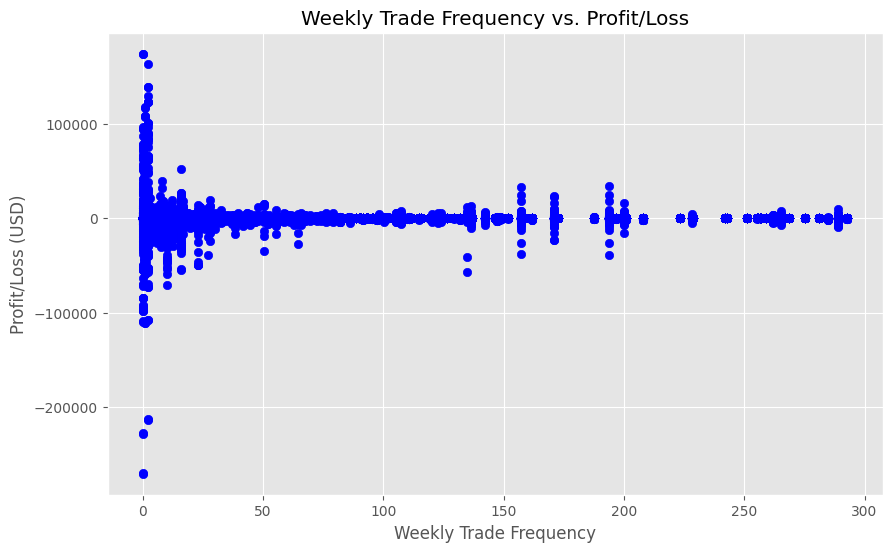

In [ ]:
min_time = pd.to_datetime(merged_usd_profit['open_time'].min(), unit='s')
max_time = pd.to_datetime(merged_usd_profit['close_time'].max(), unit='s')
total_weeks = (max_time - min_time).days / 7

trade_counts = merged_usd_profit.groupby('login').size()

merged_usd_profit['weekly_trade_frequency'] = merged_usd_profit['login'].map(trade_counts) / total_weeks

filtered_df = merged_usd_profit[merged_usd_profit['weekly_trade_frequency'] < 300]

plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['weekly_trade_frequency'], filtered_df['profit_usd'], color='blue')
plt.title('Weekly Trade Frequency vs. Profit/Loss')
plt.xlabel('Weekly Trade Frequency')
plt.ylabel('Profit/Loss (USD)')
plt.grid(True)
plt.show()

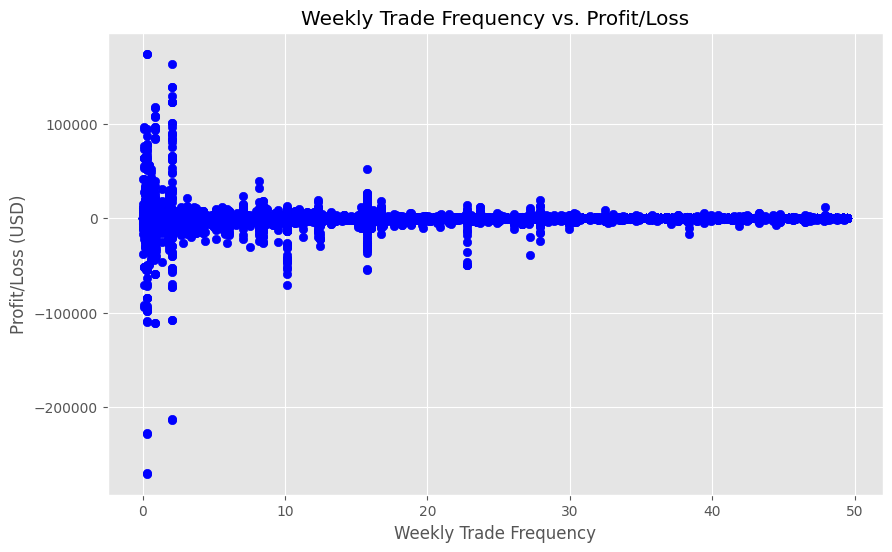

In [ ]:
min_time = pd.to_datetime(merged_usd_profit['open_time'].min(), unit='s')
max_time = pd.to_datetime(merged_usd_profit['close_time'].max(), unit='s')
total_weeks = (max_time - min_time).days / 7

trade_counts = merged_usd_profit.groupby('login').size()

merged_usd_profit['weekly_trade_frequency'] = merged_usd_profit['login'].map(trade_counts) / total_weeks

filtered_df = merged_usd_profit[merged_usd_profit['weekly_trade_frequency'] < 50]

plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['weekly_trade_frequency'], filtered_df['profit_usd'], color='blue')
plt.title('Weekly Trade Frequency vs. Profit/Loss')
plt.xlabel('Weekly Trade Frequency')
plt.ylabel('Profit/Loss (USD)')
plt.grid(True)
plt.show()

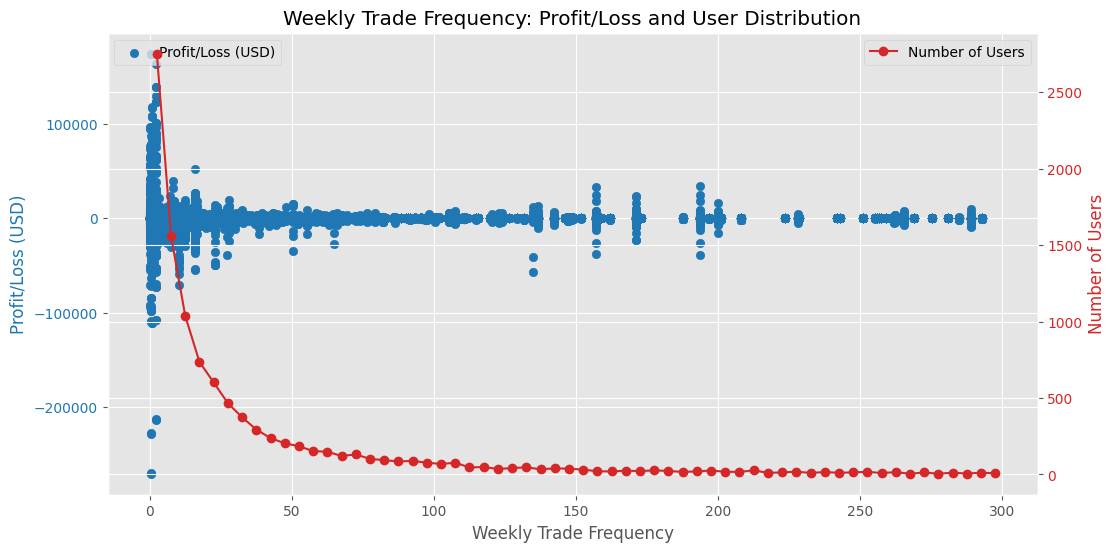

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Weekly Trade Frequency')
ax1.set_ylabel('Profit/Loss (USD)', color=color)
ax1.scatter(filtered_df['weekly_trade_frequency'], filtered_df['profit_usd'], color=color, label='Profit/Loss (USD)')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Number of Users', color=color)
ax2.plot(freq_counts.index.categories.mid, freq_counts.values, marker='o', linestyle='-', color=color, label='Number of Users')
ax2.tick_params(axis='y', labelcolor=color)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Weekly Trade Frequency: Profit/Loss and User Distribution')
ax1.grid(True)

plt.show()

In [ ]:
unique_logins = merged_usd_profit['login'].nunique()
print(f"Total unique logins: {unique_logins}")


Total unique logins: 11976


<ipython-input-47-bb98048c27d0>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='symbol', y='dpm', data=product_dpm, palette='viridis')


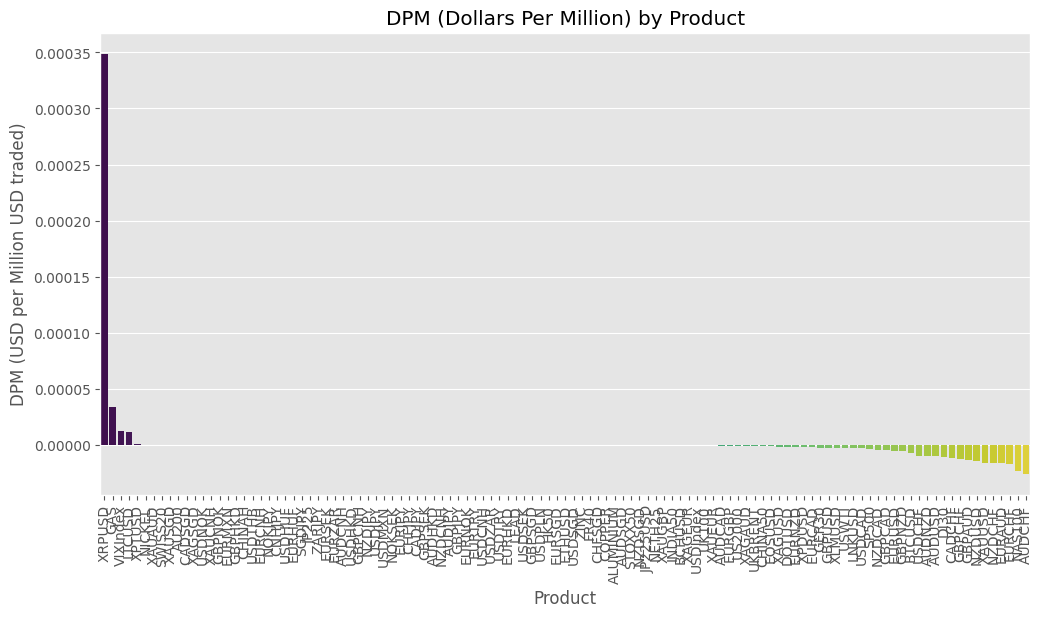

In [ ]:
merged_usd_profit['dpm'] = (merged_usd_profit['profit_usd'] / merged_usd_profit['volume_usd']) / 1_000_000

product_dpm = merged_usd_profit.groupby('symbol').agg({
    'dpm': 'sum'
}).reset_index()
product_dpm = product_dpm.sort_values('dpm', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='symbol', y='dpm', data=product_dpm, palette='viridis')
plt.title('DPM (Dollars Per Million) by Product')
plt.xlabel('Product')
plt.ylabel('DPM (USD per Million USD traded)')
plt.xticks(rotation=90)
plt.show()

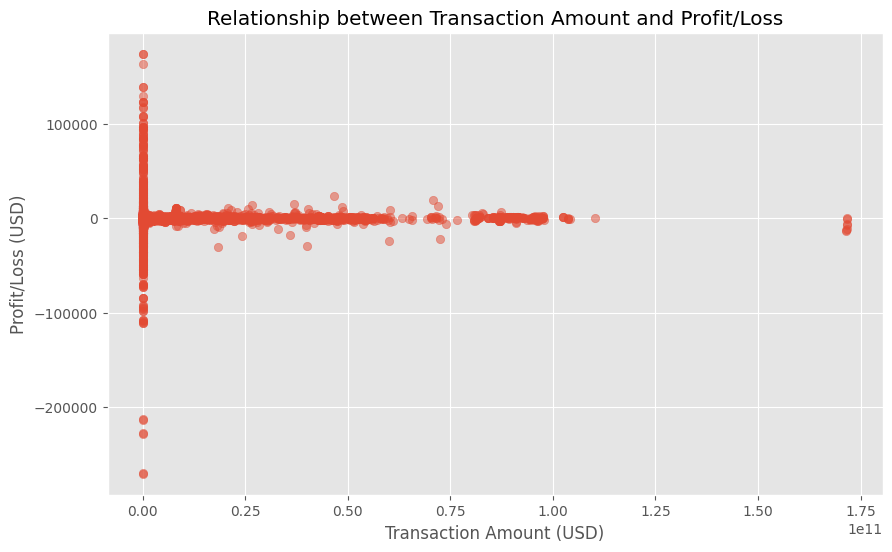

In [ ]:

plt.figure(figsize=(10, 6))
plt.scatter(merged_usd_profit['volume_usd'], merged_usd_profit['profit_usd'], alpha=0.5)
plt.title('Relationship between Transaction Amount and Profit/Loss')
plt.xlabel('Transaction Amount (USD)')
plt.ylabel('Profit/Loss (USD)')
plt.grid(True)
plt.show()

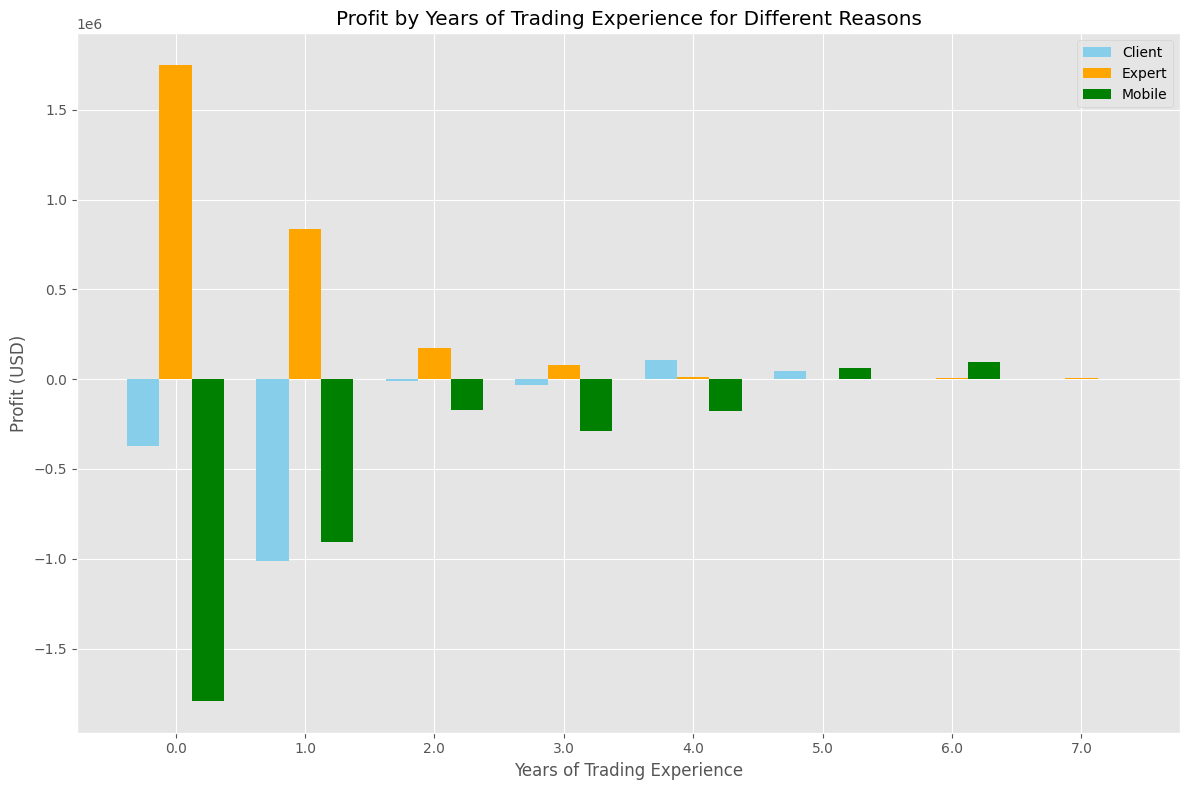

In [ ]:
data_r0 = merged_usd_profit[merged_usd_profit['reason'] == 0]
average_profit_by_years_r0 = data_r0.groupby('trading_years')['profit_usd'].sum()

data_r1 = merged_usd_profit[merged_usd_profit['reason'] == 1]
average_profit_by_years_r1 = data_r1.groupby('trading_years')['profit_usd'].sum()

data_r2 = merged_usd_profit[merged_usd_profit['reason'] == 5]
average_profit_by_years_r2 = data_r2.groupby('trading_years')['profit_usd'].sum()

combined_profit = pd.DataFrame({
    'Client': average_profit_by_years_r0,
    'Expert': average_profit_by_years_r1,
    'Mobile': average_profit_by_years_r2
})

plt.figure(figsize=(12, 8))
bar_width = 0.25

index = np.arange(len(combined_profit))

plt.bar(index, combined_profit['Client'], bar_width, label='Client', color='skyblue')
plt.bar(index + bar_width, combined_profit['Expert'], bar_width, label='Expert', color='orange')
plt.bar(index + 2 * bar_width, combined_profit['Mobile'], bar_width, label='Mobile', color='green')

plt.xlabel('Years of Trading Experience')
plt.ylabel('Profit (USD)')
plt.title('Profit by Years of Trading Experience for Different Reasons')
plt.xticks(index + bar_width, combined_profit.index)

plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()


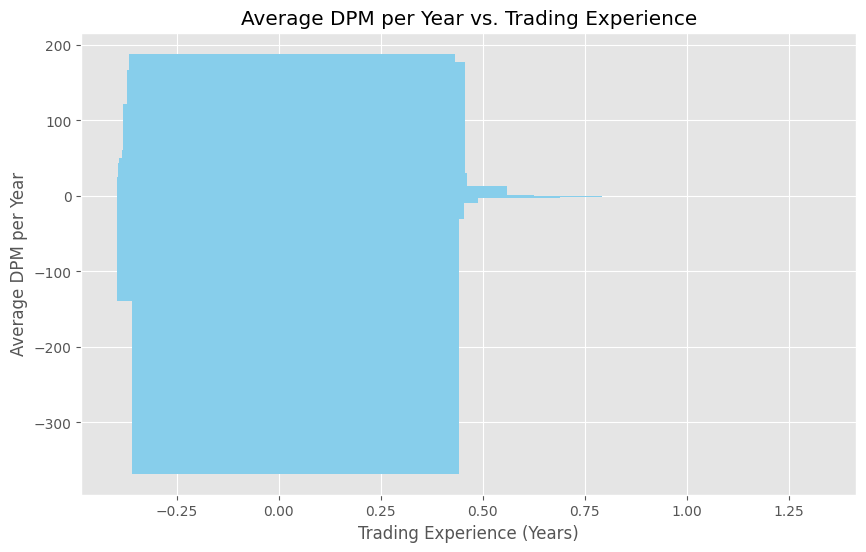

In [ ]:
merged_usd_profit['open_time'] = pd.to_datetime(merged_usd_profit['open_time'], unit='s')
merged_usd_profit['close_time'] = pd.to_datetime(merged_usd_profit['close_time'], unit='s')
merged_usd_profit['trade_duration'] = (merged_usd_profit['close_time'] - merged_usd_profit['open_time']).dt.days

filtered_df = merged_usd_profit[merged_usd_profit['reason'] == 1]
grouped_df = filtered_df.groupby('login').agg(
    total_profit_usd=('profit_usd', 'sum'),
    total_trade_duration=('trade_duration', 'max'),
)
grouped_df['years_traded'] = grouped_df['total_trade_duration'] / 365
grouped_df['avg_dpm_per_year'] = grouped_df['total_profit_usd'] / grouped_df['years_traded']/100000

plt.figure(figsize=(10, 6))
plt.bar(grouped_df['years_traded'], grouped_df['avg_dpm_per_year'], color='skyblue')
plt.title('Average DPM per Year vs. Trading Experience')
plt.xlabel('Trading Experience (Years)')
plt.ylabel('Average DPM per Year')
plt.grid(True)
plt.show()

In [ ]:

top_profits = merged_usd_profit.nlargest(100, 'profit_usd')
top_losses = merged_usd_profit.nsmallest(100, 'profit_usd')

print("Top 20 Most Profitable Trades:")
print(top_profits[['login', 'symbol', 'open_time', 'close_time', 'profit_usd']])
print("\nTop 20 Most Loss-Making Trades:")
print(top_losses[['login', 'symbol', 'open_time', 'close_time', 'profit_usd']])

Top 20 Most Profitable Trades:
            login  symbol           open_time          close_time  \
4521776   7057066  XAUUSD 2024-01-29 12:14:42 2024-02-01 18:10:48   
4521775   7057066  XAUUSD 2024-01-29 12:14:44 2024-02-01 18:10:48   
4521774  88944670  XAUUSD 2023-11-10 20:53:51 2023-11-16 17:14:46   
4521773  88944670  XAUUSD 2023-10-06 18:41:31 2023-10-09 22:31:44   
4521772  88944670  XAUUSD 2023-10-06 18:41:26 2023-10-09 22:31:45   
...           ...     ...                 ...                 ...   
4521681    805483  XAUUSD 2023-10-03 21:01:54 2023-10-09 01:03:40   
4521680    805483  XAUUSD 2023-10-24 21:19:25 2023-10-27 21:15:08   
4521679    823915  XAUUSD 2023-12-18 21:56:37 2023-12-22 01:42:33   
4521678    505989  NZDCAD 2023-05-26 18:30:00 2023-07-13 16:39:09   
4521677    805483  XAUUSD 2023-11-14 08:42:17 2023-11-15 15:30:03   

            profit_usd  
4521776  174017.250000  
4521775  173721.000000  
4521774  163345.000000  
4521773  138516.000000  
4521772  138322

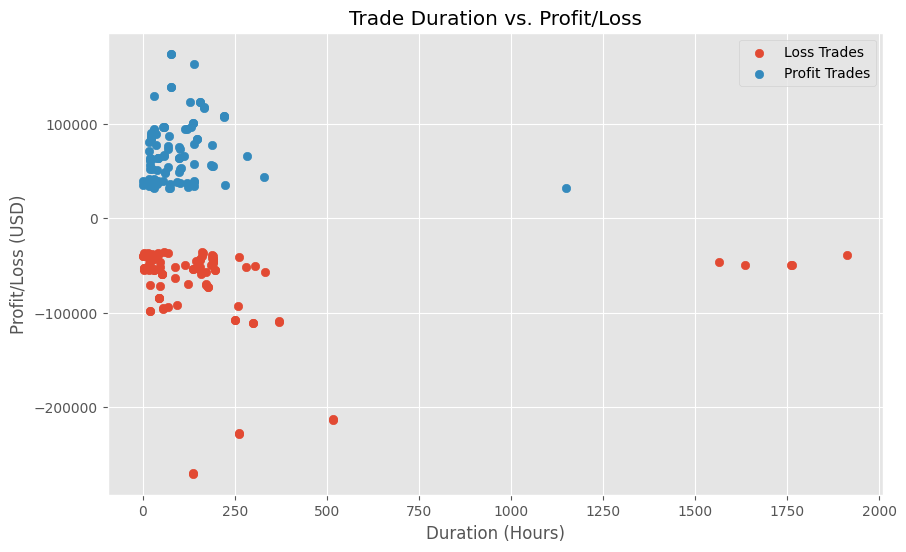

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

top_trades = pd.concat([top_profits, top_losses])
top_trades['duration'] = (top_trades['close_time'] - top_trades['open_time']).dt.total_seconds() / 3600
top_trades['type'] = ['Profit' if x > 0 else 'Loss' for x in top_trades['profit_usd']]

plt.figure(figsize=(10, 6))
for label, grp in top_trades.groupby('type'):
    plt.scatter(grp['duration'], grp['profit_usd'], label=f'{label} Trades')
plt.title('Trade Duration vs. Profit/Loss')
plt.xlabel('Duration (Hours)')
plt.ylabel('Profit/Loss (USD)')
plt.legend()
plt.grid(True)
plt.show()
